In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

dataset1 = pd.read_csv('final_dataset.csv')
dataset1.head()

# dataset = dataset1.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG','HTP','ATP',
#        'HTGS', 'ATGS', 'HTGC', 'ATGC','HM1','HM2','HM3','AM1','AM2','AM3',
#        'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
#        'ATFormPtsStr'] )

dataset = dataset1.copy().drop(columns =['Date', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC'] )
# dataset['HomeTeam'] = dataset['HomeTeam'].astype('category')
# dataset['AwayTeam'] = dataset['AwayTeam'].astype('category')
# dataset['HomeTeam'] = dataset['HomeTeam'].cat.codes
# dataset['AwayTeam'] = dataset['AwayTeam'].cat.codes
dataset.head()

,Unnamed: 0,HomeTeam,AwayTeam,FTR,HTP,ATP,HM1,HM2,HM3,HM4,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,Charlton,Man City,H,0.0,0.0,M,M,M,M,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,Chelsea,West Ham,H,0.0,0.0,M,M,M,M,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,Coventry,Middlesbrough,NH,0.0,0.0,M,M,M,M,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,Derby,Southampton,NH,0.0,0.0,M,M,M,M,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,Leeds,Everton,H,0.0,0.0,M,M,M,M,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [ ]:
def preprocess_features(X):
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

In [ ]:
X_all = dataset.drop(['FTR'],1)
y_all = dataset['FTR']



from sklearn.preprocessing import scale
cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])

X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

X_all = preprocess_features(X_all)
# for i in X_all.columns:
#   print(i)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.3,
                                                    random_state = 2,
                                          stratify = y_all)
for i in  X_all.columns:
  if((i > 'HomeTeam' or i > 'AwayTeam' or i > 'HM' or i > 'AM' or i> 'HTFormPtsStr' or  i > 'AM') and X_train[i][6142]==0):
    x=1
  else:
    print(i," : ", X_train[i][6142])
print("result", y_train[6142])

C:\Users\RBTC\AppData\Local\Temp\ipykernel_22172\1590729361.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_all = dataset.drop(['FTR'],1)


Unnamed: 0  :  6142
HomeTeam_Sunderland  :  1
AwayTeam_West Brom  :  1
HTP  :  -2.0110563050754355
ATP  :  -0.16039951974894381
HM1_L  :  1
HM2_L  :  1
HM3_L  :  1
HM4_D  :  1
HM5_L  :  1
AM1_D  :  1
AM2_W  :  1
AM3_L  :  1
AM4_D  :  1
AM5_L  :  1
MW  :  7.0
HTFormPtsStr_LLLDL  :  1
ATFormPtsStr_DWLDL  :  1
HTFormPts  :  1
ATFormPts  :  5
HTGD  :  -1.4279019405882838
ATGD  :  0.18519360196497417
DiffPts  :  -1.0
DiffFormPts  :  -0.5714285714285714
result NH


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', max_iter=1000, random_state = 1)
classifier.fit(X_train, y_train)

c:\Users\RBTC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=1)

Accuracy from Confusion Marix is:  65.8869395711501 %


Text(33.0, 0.5, 'Actual Label')

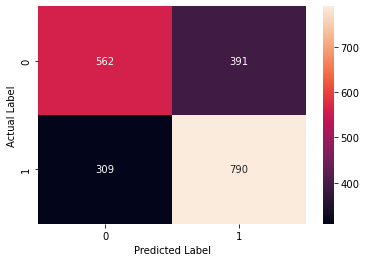

In [ ]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')
# 1323
DS = cm.trace()
TS= cm.sum()
#dividing accurate to total to calculate accuracy 
print("Accuracy from Confusion Marix is: ", (DS/TS)*100, "%")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
Y_pred_proba = classifier.predict_proba(X_test)
for i in  X_all.columns:
  if((i > 'HomeTeam' or i > 'AwayTeam' or i > 'HM' or i > 'AM' or i> 'HTFormPtsStr' or  i > 'AM') and X_test[i][4835]==0):
    x=1
  else:
    print(i," : ", X_test[i][4835])
print(Y_pred_proba[2])
print("Result : ", y_test[4835])

NameError: name 'classifier' is not defined

In [ ]:
print(X_test['Match'])
for i in X_test['Match']:
  print(i)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='gini', n_estimators=2000, min_samples_leaf=1, min_samples_split=5,max_features='auto',oob_score=True,random_state=1,n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=2000, n_jobs=-1,
                       oob_score=True, random_state=1)

Accuracy from Confusion Marix is:  65.59454191033139 %


Text(33.0, 0.5, 'Actual Label')

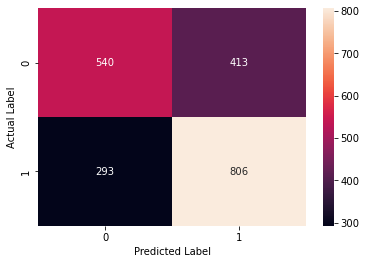

In [ ]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')
#RFC 1320
DS = cm.trace()
TS= cm.sum()
#dividing accurate to total to calculate accuracy 
print("Accuracy from Confusion Marix is: ", (DS/TS)*100, "%")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(120,80,60),activation = 'tanh',random_state=1, max_iter=100000)
classifier.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(120, 80, 60),
              max_iter=100000, random_state=1)

Accuracy from Confusion Marix is:  61.452241715399616 %


Text(33.0, 0.5, 'Actual Label')

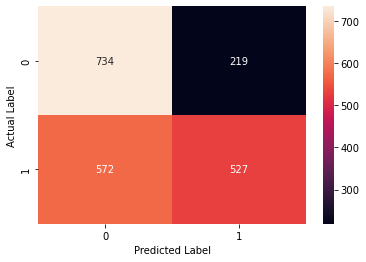

In [ ]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')
#RFC 1320
DS = cm.trace()
TS= cm.sum()
#dividing accurate to total to calculate accuracy 
print("Accuracy from Confusion Marix is: ", (DS/TS)*100, "%")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)
classifier = GaussianProcessClassifier(kernel=kernel,random_state=1)
classifier.fit(X_train, y_train)

KeyboardInterrupt: 

Accuracy from Confusion Marix is:  53.3625730994152 %


Text(33.0, 0.5, 'Actual Label')

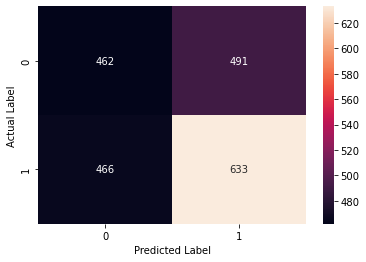

In [ ]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')
DS = cm.trace()
TS= cm.sum()
#dividing accurate to total to calculate accuracy 
print("Accuracy from Confusion Marix is: ", (DS/TS)*100, "%")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy from Confusion Marix is:  52.92397660818714 %


Text(33.0, 0.5, 'Actual Label')

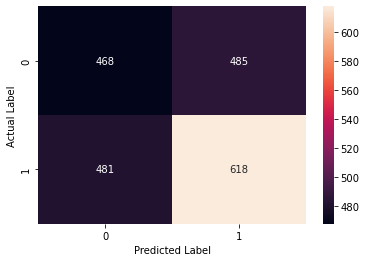

In [ ]:
Y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')
DS = cm.trace()
TS= cm.sum()
#dividing accurate to total to calculate accuracy 
print("Accuracy from Confusion Marix is: ", (DS/TS)*100, "%")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')